In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# cria um plot 3D dinâmico
%matplotlib widget

## Harmônicos Esféricos

$$Y_l^m(\theta,\phi) = \epsilon\sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}} e^{i m \phi} P_l^m(\cos{\theta})$$

com $\epsilon = (-1)^m$ se $m \geq 0$ e $\epsilon=1$ se $m<0$.

In [2]:
# Grids dos ângulos polares e azimutais.
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

# Cria uma grade de pontos em coordenadas esféricas.
theta, phi = np.meshgrid(theta, phi)
# Calcula as coordenadas cartesianas correspondentes.
xyz = np.array([np.sin(theta) * np.cos(phi),
                np.sin(theta) * np.sin(phi),
                np.cos(theta)])

In [3]:
def plot_Y(ax, l, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # Nota: no SciPy's sph_harm troca a theta com phi. Pois é!
    Y = sph_harm(abs(m), l, phi, theta)

    # Combinação linear de partes real e imaginária, dependendo do sinal de m.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Mapa de cores para a superfície.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('coolwarm'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Desenha os eixos cartesianos.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Define o título e os limites dos eixos.
    ax.set_title(fr'$Y_{l}^{m}$')
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

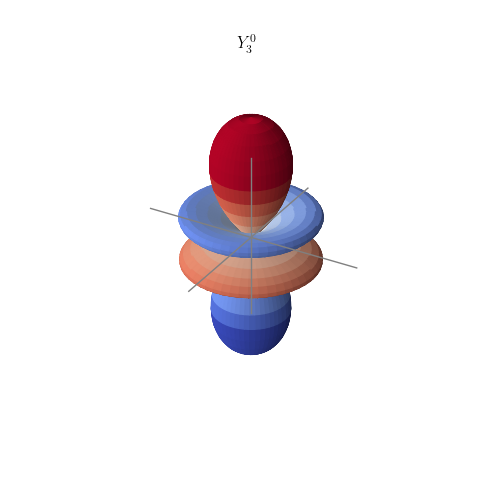

In [6]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
# plt.savefig('Y{}_{}.png'.format(l, m))

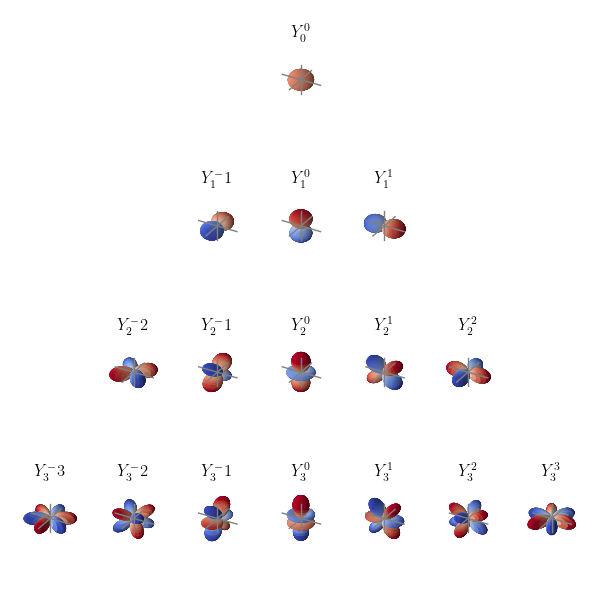

In [5]:
el_max = 3
figsize_px, DPI = 600, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        # print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
# plt.savefig('sph_harm.png')
# plt.show()